In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## 모델에 input하여, 주간 지수값 생성

In [2]:
# 최종 모델
model = pickle.load(open('./final_model.pkl','rb'))
# 생성한 주간 지수 값 테이블
weeklydata = pickle.load(open('./final_table.pkl','rb'))

In [3]:
weeklydata

,date,keyword1,keyword2,keyword3,keyword4,keyword5,google,naver,ccsi,weeklyCLI
0,2016.1.4,825,419,437,986,168,53.0,26.05846,99.5,100.114651
1,2016.1.11,770,348,351,626,182,58.0,25.16599,99.5,100.218829
2,2016.1.18,918,422,441,445,147,74.0,27.38639,99.5,96.924625
3,2016.1.25,1067,425,567,383,148,59.0,24.72622,99.5,90.786863
4,2016.2.1,899,341,485,289,110,63.0,23.01888,97.2,90.612911
...,...,...,...,...,...,...,...,...,...,...
247,2020.9.28,489,90,114,95,78,63.0,25.29102,79.4,101.857171
248,2020.10.5,816,183,177,109,78,81.0,28.63240,91.6,104.707534
249,2020.10.12,857,199,176,112,91,82.0,26.85177,91.6,100.781811
250,2020.10.19,911,155,143,95,129,93.0,27.25273,91.6,100.454511


## 유효성 확인

* test set의 주간 지수와 소비자심리지수의 상관계수 확인 <br>
: 상관계수가 0.772328로 강한 양의 상관관계를 갖는다. 

In [39]:
X_train = pickle.load(open('./dataset/dataset_mean/X_train.pkl','rb'))
X_test = pickle.load(open('./dataset/dataset_mean/X_test.pkl','rb'))
y_test = pickle.load(open('./dataset/dataset_mean/y_test.pkl','rb'))
scaler = pickle.load(open('./final_scaler.pkl','rb'))
y_pred = model.predict( scaler.transform(X_test) )

In [36]:
X_test

,keyword1,keyword2,keyword3,keyword4,keyword5,google,naver
46,679.75,263.75,210.25,177.75,120.50,75.50,29.126060
47,635.20,233.20,242.20,217.00,153.80,61.80,24.001892
48,573.25,197.00,222.50,146.00,110.75,60.00,23.154688
49,1110.75,214.25,231.75,99.00,101.75,64.75,32.321935
50,1948.40,1067.40,311.80,84.20,297.60,85.40,67.922736
51,1737.75,730.50,264.75,70.50,342.00,84.75,49.555913
52,1587.00,497.50,214.25,81.00,266.50,84.75,36.870520
53,1266.80,371.80,208.20,80.20,208.60,91.00,39.395528
54,1108.00,301.50,175.75,71.25,224.25,76.75,32.617267
55,890.00,234.40,164.80,65.60,128.60,77.00,34.671030


In [5]:
test = pd.DataFrame()
test['ccsi'] = y_test['ccsi'].tolist()
test['weeklyCLI'] = y_pred
test

,ccsi,weeklyCLI
0,101.0,101.449447
1,100.5,102.664026
2,104.2,104.383415
3,96.9,93.720528
4,78.4,63.123782
5,70.8,73.367836
6,77.6,82.582731
7,81.8,87.917174
8,84.2,92.948666
9,88.2,97.266927


In [6]:
test[['weeklyCLI', 'ccsi']].corr(method = 'pearson') 

,weeklyCLI,ccsi
weeklyCLI,1.000000,0.772328
ccsi,0.772328,1.000000


* test set에 대한 RMSE <br>
: 88.52477

In [7]:
print("test RMSE about weekly CCSI: ", np.sqrt(mean_squared_error(test['weeklyCLI'], test['ccsi'])))

test RMSE about weekly CCSI:  8.524772665673815


* 전체 레코드에 대한 RMSE <br>
: 4.8075로 작은 값. ccsi의 추세를 잘 따라간다.

In [8]:
print("RMSE about weekly CCSI: ", np.sqrt(mean_squared_error(weeklydata['weeklyCLI'], weeklydata['ccsi'])))

RMSE about weekly CCSI:  4.807544722268003


* 개발한 주간 경제보조지수가 월간 경제 지표인 소비자 심리지수의 추세를 잘 따르는지 확인<br>
: 시각화결과, 펜데믹 사태로 인해 경제 상황이 안좋아진 2020년에 대해서는 매우 좋은 예측력을 보이지는 않았다. 따라서 2020년의 데이터를 살펴보며 추가적인 사후분석을 하고자 한다.

<ipython-input-9-9b8448456c20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


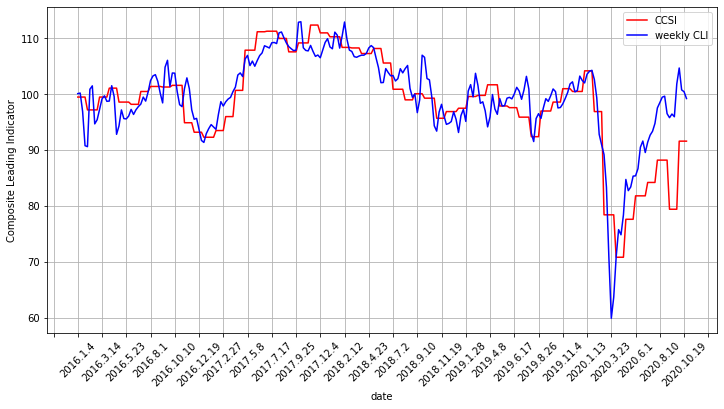

In [9]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(weeklydata['date'], weeklydata['ccsi'], color = 'red', label = 'CCSI')
plt.plot(weeklydata['date'], weeklydata['weeklyCLI'], color = 'blue', label = 'weekly CLI')
plt.xlabel("date")
plt.ylabel("Composite Leading Indicator")
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.grid(True)
plt.legend()
plt.show()

## 사후 분석

* lasso model의 계수 <br>
lasso model의 계수를 확인한 결과 6번째 변수인 google의 계수가 0임을 알 수 있다. 따라서 google의 가중치가 0이므로 변수 7개 중 6개만 사용된다. keyword1, keyword2, keyword3, keyword5, naver의 계수는 음수이고 keyword4의 계수만 양수이다.

In [10]:
model.coef_

array([-2.24465305, -0.31591057, -2.56756448,  0.90718337, -0.39515066,
        0.        , -1.95358518])

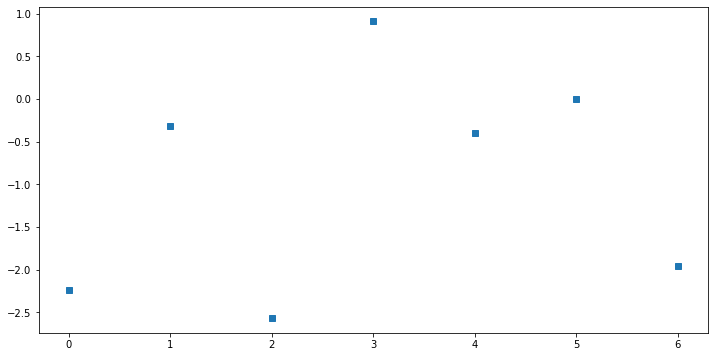

In [11]:
plt.plot(model.coef_, 's', label="Lasso alpha=1")
plt.show()

In [12]:
# data = pd.DataFrame()
data = weeklydata.iloc[:,[1,2,3,4,5,6,7]]
data

,keyword1,keyword2,keyword3,keyword4,keyword5,google,naver
0,825,419,437,986,168,53.0,26.05846
1,770,348,351,626,182,58.0,25.16599
2,918,422,441,445,147,74.0,27.38639
3,1067,425,567,383,148,59.0,24.72622
4,899,341,485,289,110,63.0,23.01888
...,...,...,...,...,...,...,...
247,489,90,114,95,78,63.0,25.29102
248,816,183,177,109,78,81.0,28.63240
249,857,199,176,112,91,82.0,26.85177
250,911,155,143,95,129,93.0,27.25273


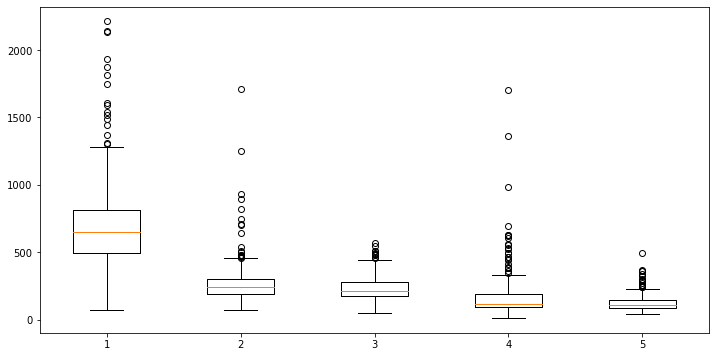

In [13]:
plot_data = [data.keyword1, data.keyword2, data.keyword3, data.keyword4, data.keyword5]
ax = plt.boxplot(plot_data)
plt.show()

In [14]:
data.corr()

,keyword1,keyword2,keyword3,keyword4,keyword5,google,naver
keyword1,1.000000,0.772901,0.324893,0.544286,0.669054,0.601180,0.605412
keyword2,0.772901,1.000000,0.288222,0.714644,0.691381,0.422582,0.698026
keyword3,0.324893,0.288222,1.000000,0.176619,0.183746,-0.076229,-0.093266
keyword4,0.544286,0.714644,0.176619,1.000000,0.418494,0.265786,0.575139
keyword5,0.669054,0.691381,0.183746,0.418494,1.000000,0.454692,0.505565
google,0.601180,0.422582,-0.076229,0.265786,0.454692,1.000000,0.675322
naver,0.605412,0.698026,-0.093266,0.575139,0.505565,0.675322,1.000000


- 2016.01~2019.10:train set
- 2019.11~2020.10: test set<br>
test set으로 사용된 data 중 2019년 11월, 12월, 2020년 1월은 잘 추정된 것을 확인할 수 있으나 코로나로 인해 경제상황이 악화된 2020년의 예측력은 좋지 않음을 확인할 수 있다. 2020년 2월, 3월은 ccsi 보다 낮게 예측이 되고 2020년 4월 이후부터는 ccsi보다 높게 예측되는 것을 볼 수 있다.

<ipython-input-15-3f46f2a2f5f0>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


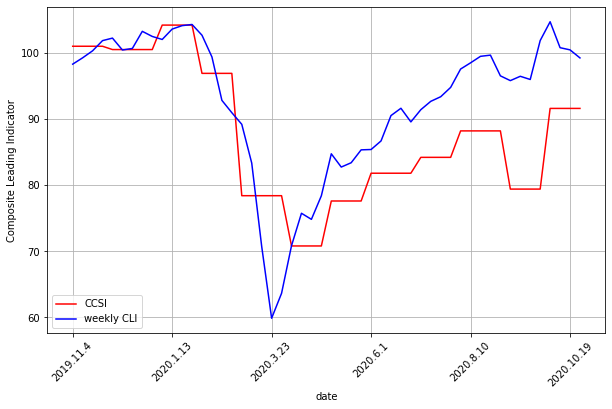

In [15]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(weeklydata['date'][200:], weeklydata['ccsi'][200:], color = 'red', label = 'CCSI')
plt.plot(weeklydata['date'][200:], weeklydata['weeklyCLI'][200:], color = 'blue', label = 'weekly CLI')
plt.xlabel("date")
plt.ylabel("Composite Leading Indicator")
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.grid(True)
plt.legend()
plt.show()

- 각 data들의 column 별로 max값을 가지는 날짜를 본 결과 2020년 3월에 몰려있는 것을 볼 수 있다. 실제 데이터를 확인한 결과 모든 변수들이 2020년 3월에 큰 값을 가지는 것을 확인할 수 있다. 우리의 라쏘 모델은 keyword4를 제외한 모든 변수가 음의 계수를 가지므로 ccsi가 매우 낮게 예측된다. 

In [16]:
index = max(enumerate(weeklydata['keyword1']), key=(lambda x: x[1]))[0]
print(weeklydata['date'][index])
index = max(enumerate(weeklydata['keyword2']), key=(lambda x: x[1]))[0]
print(weeklydata['date'][index])
index = max(enumerate(weeklydata['keyword3']), key=(lambda x: x[1]))[0]
print(weeklydata['date'][index])
index = max(enumerate(weeklydata['keyword4']), key=(lambda x: x[1]))[0]
print(weeklydata['date'][index])
index = max(enumerate(weeklydata['keyword5']), key=(lambda x: x[1]))[0]
print(weeklydata['date'][index])
index = max(enumerate(weeklydata['naver']), key=(lambda x: x[1]))[0]
print(weeklydata['date'][index])

2020.3.23
2020.3.16
2016.1.25
2020.3.9
2020.4.20
2020.3.16


In [17]:
weeklydata[200:]

,date,keyword1,keyword2,keyword3,keyword4,keyword5,google,naver,ccsi,weeklyCLI
200,2019.11.4,750,281,202,82,172,81.0,31.79270,101.0,98.292634
201,2019.11.11,748,253,200,81,95,73.0,29.41277,101.0,99.251600
202,2019.11.18,662,220,255,99,106,73.0,27.95981,101.0,100.309949
203,2019.11.25,559,301,184,66,109,75.0,27.33896,101.0,101.850923
204,2019.12.2,584,191,254,112,174,68.0,27.01560,100.5,102.231529
205,2019.12.9,655,283,212,87,306,64.0,24.45028,100.5,100.431163
206,2019.12.16,651,179,264,109,98,68.0,24.54514,100.5,100.668229
207,2019.12.23,553,217,228,89,70,54.0,21.55298,100.5,103.256555
208,2019.12.30,733,296,253,68,121,55.0,22.44546,100.5,102.484171
209,2020.1.6,610,173,215,83,68,60.0,24.03638,104.2,102.026730


In [37]:
X_test.describe()

,keyword1,keyword2,keyword3,keyword4,keyword5,google,naver
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1105.408333,374.858333,215.770833,100.083333,181.529167,77.100000,36.031853
std,448.954869,270.048857,43.584210,52.201604,83.958457,10.221324,12.286095
min,573.250000,181.000000,164.800000,49.000000,101.750000,60.000000,23.154688
25%,809.875000,212.187500,176.875000,69.275000,118.062500,72.812500,28.905907
50%,999.000000,249.075000,212.250000,80.600000,141.200000,77.000000,33.558244
75%,1346.850000,403.225000,234.362500,110.750000,234.812500,84.912500,37.501772
max,1948.400000,1067.400000,311.800000,217.000000,342.000000,91.000000,67.922736


In [40]:
X_train.describe()

,keyword1,keyword2,keyword3,keyword4,keyword5,google,naver
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.00000,46.000000
mean,604.865217,250.001087,246.926087,171.355435,118.065217,63.78913,28.713662
std,162.543112,62.939887,93.165277,90.891290,30.831688,7.98879,7.275714
min,299.800000,160.800000,115.800000,69.800000,72.800000,47.00000,19.261010
25%,452.312500,207.012500,181.300000,92.225000,94.125000,59.03750,23.069539
50%,627.725000,243.625000,213.000000,135.750000,112.075000,64.82500,26.775455
75%,724.062500,284.150000,298.250000,247.812500,134.275000,68.93750,33.200553
max,895.000000,403.500000,466.400000,433.000000,195.750000,79.75000,49.451362


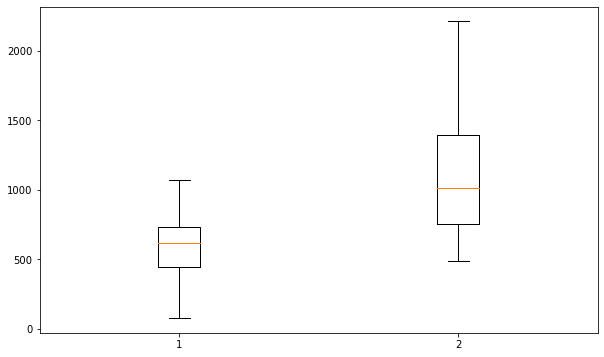

In [18]:
plot_data = [weeklydata['keyword1'][:200], weeklydata['keyword1'][200:]]
ax = plt.boxplot(plot_data)
plt.show()

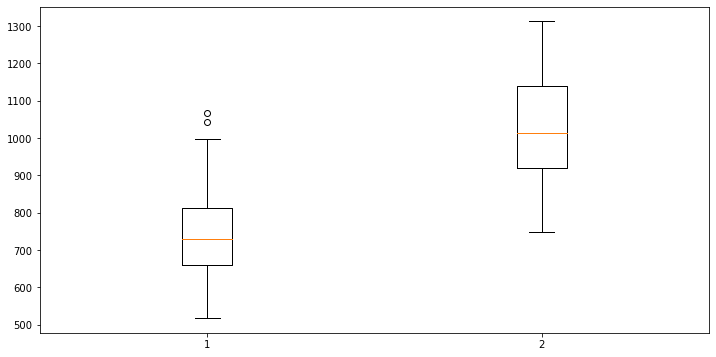

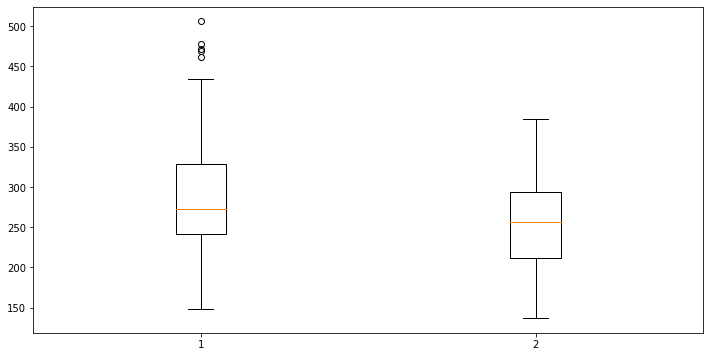

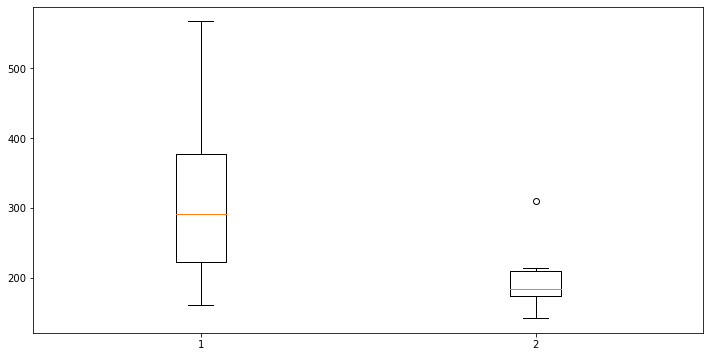

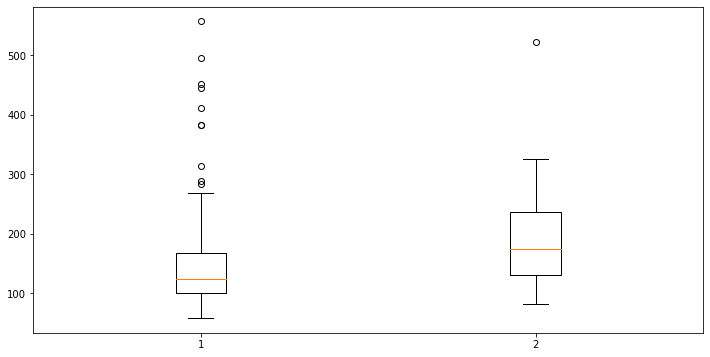

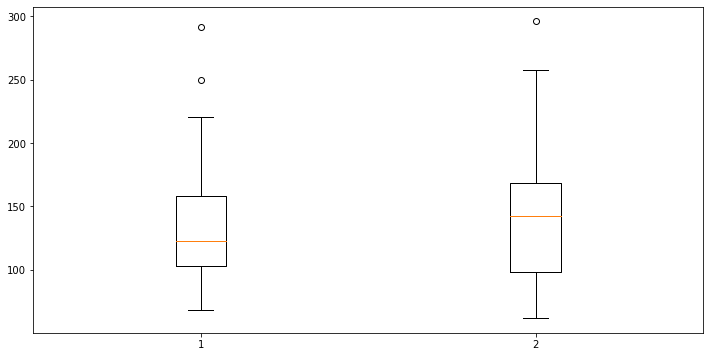

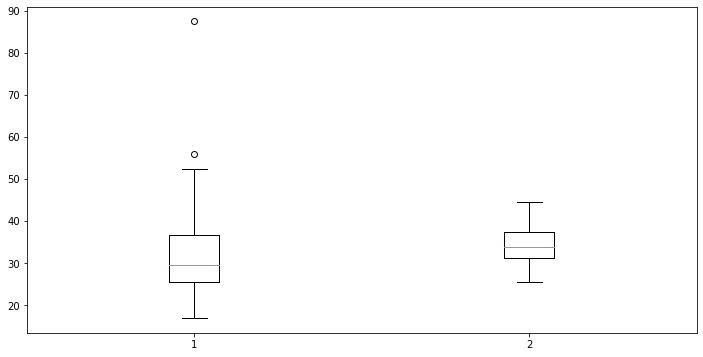

In [34]:
train_array = []
for i in range(0, 200):
    if weeklydata['weeklyCLI'][i] >= 90 and weeklydata['weeklyCLI'][i] <= 100:
        train_array.append([weeklydata['keyword1'][i], weeklydata['keyword2'][i], weeklydata['keyword3'][i], weeklydata['keyword4'][i], weeklydata['keyword5'][i], weeklydata['naver'][i], 1])
train_array = np.array(train_array)

test_array = []
for i in range(200, len(weeklydata)):
    if weeklydata['weeklyCLI'][i] >= 90 and weeklydata['weeklyCLI'][i] <= 100:
        test_array.append([weeklydata['keyword1'][i], weeklydata['keyword2'][i], weeklydata['keyword3'][i], weeklydata['keyword4'][i], weeklydata['keyword5'][i], weeklydata['naver'][i], 2])
test_array = np.array(test_array)


plot_data = [train_array[:, 0], test_array[:, 0]]
ax = plt.boxplot(plot_data)
plt.show()
plot_data = [train_array[:, 1], test_array[:, 1]]
ax2 = plt.boxplot(plot_data)
plt.show()
plot_data = [train_array[:, 2], test_array[:, 2]]
ax3 = plt.boxplot(plot_data)
plt.show()
plot_data = [train_array[:, 3], test_array[:, 3]]
ax3 = plt.boxplot(plot_data)
plt.show()
plot_data = [train_array[:, 4], test_array[:, 4]]
ax3 = plt.boxplot(plot_data)
plt.show()
plot_data = [train_array[:, 5], test_array[:, 5]]
ax3 = plt.boxplot(plot_data)
plt.show()

In [35]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

keyword1data = np.append(train_array, test_array, axis=0)
comp = MultiComparison(keyword1data[: , 0], keyword1data[:, 6])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
1.0,2.0,-8.7684,0.0,0.0,True


<ipython-input-21-943959bfa8eb>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


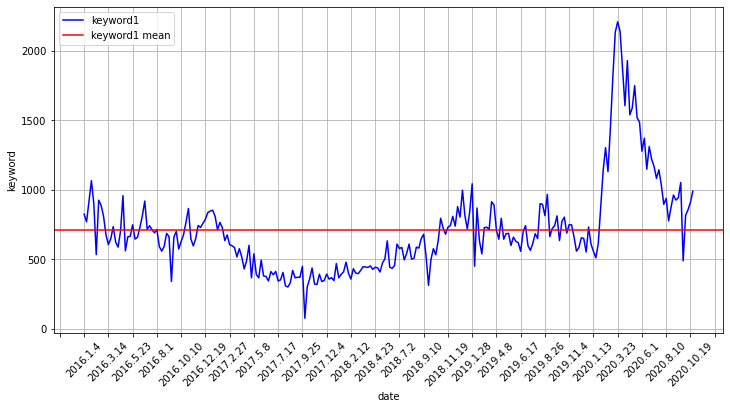

In [21]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(weeklydata['date'], weeklydata['keyword1'], color = 'blue', label = 'keyword1')
plt.axhline(y=weeklydata['keyword1'].mean(), color = 'red', label = 'keyword1 mean')

plt.xlabel("date")
plt.ylabel("keyword")
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-22-60d27d40a5c8>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


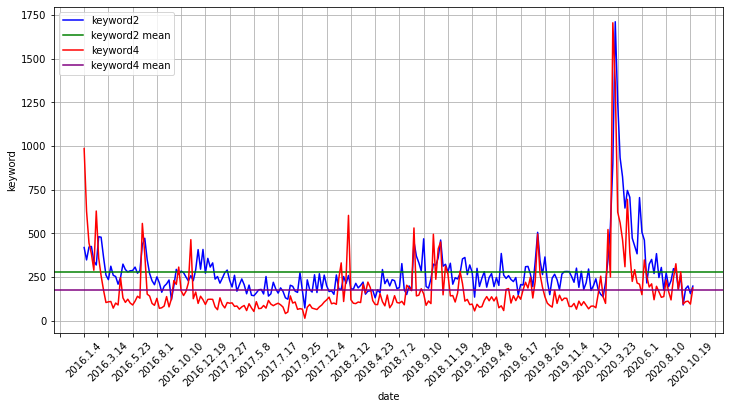

In [22]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(weeklydata['date'], weeklydata['keyword2'], color = 'blue', label = 'keyword2')
plt.axhline(y=weeklydata['keyword2'].mean(), color = 'green', label = 'keyword2 mean')
plt.plot(weeklydata['date'], weeklydata['keyword4'], color = 'red', label = 'keyword4')
plt.axhline(y=weeklydata['keyword4'].mean(), color = 'purple', label = 'keyword4 mean')

plt.xlabel("date")
plt.ylabel("keyword")
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.grid(True)
plt.legend()
plt.show()

In [23]:
print(weeklydata['keyword1'].mean())
print(weeklydata['keyword1'][:200].mean())
print(weeklydata['keyword1'][200:222].mean())
print(weeklydata['keyword1'][222:].mean())

710.0238095238095
605.245
1017.0
1183.4333333333334


In [24]:
print(weeklydata['keyword2'].mean())
print(weeklydata['keyword2'][:200].mean())
print(weeklydata['keyword2'][200:222].mean())
print(weeklydata['keyword2'][222:].mean())

277.0753968253968
249.56
418.3181818181818
356.93333333333334


In [25]:
print(weeklydata['keyword3'].mean())
print(weeklydata['keyword3'][:200].mean())
print(weeklydata['keyword3'][200:222].mean())
print(weeklydata['keyword3'][222:].mean())

240.68650793650792
246.79
246.72727272727272
195.56666666666666


In [26]:
print(weeklydata['keyword4'].mean())
print(weeklydata['keyword4'][:200].mean())
print(weeklydata['keyword4'][200:222].mean())
print(weeklydata['keyword4'][222:].mean())

177.42460317460316
155.765
304.6363636363636
228.53333333333333


In [27]:
print(weeklydata['keyword5'].mean())
print(weeklydata['keyword5'][:200].mean())
print(weeklydata['keyword5'][200:222].mean())
print(weeklydata['keyword5'][222:].mean())

131.38095238095238
118.01
163.13636363636363
197.23333333333332


In [28]:
print(weeklydata['naver'].mean())
print(weeklydata['naver'][:200].mean())
print(weeklydata['naver'][200:222].mean())
print(weeklydata['naver'][222:].mean())

30.2822519047619
28.67803675
36.274266818181815
36.58287533333332


<ipython-input-29-d3ad8d59b990>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


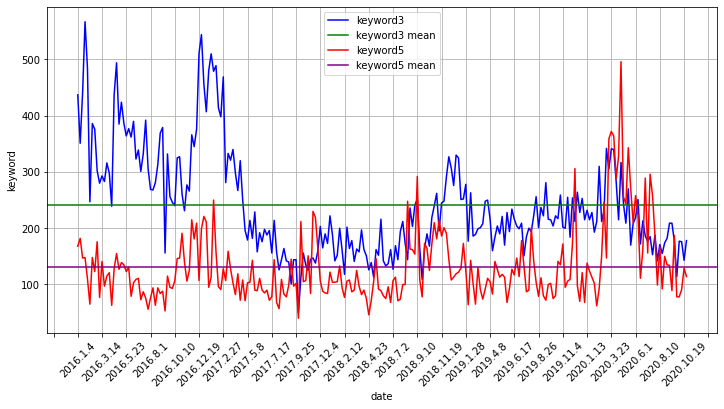

In [29]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(weeklydata['date'], weeklydata['keyword3'], color = 'blue', label = 'keyword3')
plt.axhline(y=weeklydata['keyword3'].mean(), color = 'green', label = 'keyword3 mean')
plt.plot(weeklydata['date'], weeklydata['keyword5'], color = 'red', label = 'keyword5')
plt.axhline(y=weeklydata['keyword5'].mean(), color = 'purple', label = 'keyword5 mean')
plt.xlabel("date")
plt.ylabel("keyword")
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-30-1316b1fc8e6c>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


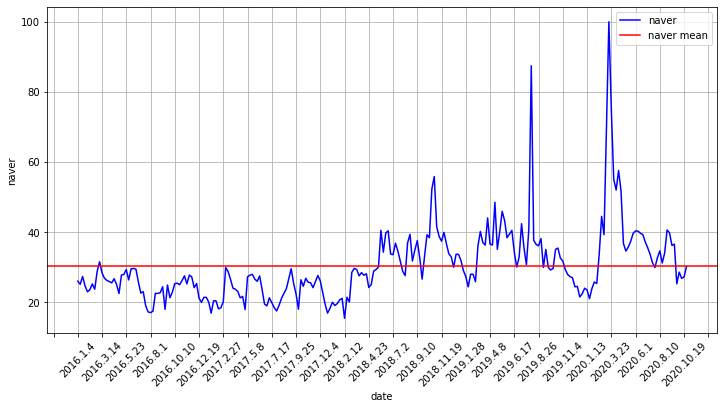

In [30]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(weeklydata['date'], weeklydata['naver'], color = 'blue', label = 'naver')
plt.axhline(y=weeklydata['naver'].mean(), color = 'red', label = 'naver mean')
plt.xlabel("date")
plt.ylabel("naver")
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.grid(True)
plt.legend()
plt.show()

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(data['google'], data['naver'], alpha=0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj    lower    upper   reject
-----------------------------------------------------------
15.48245 16.91385      8.0    0.9  -77.4537  93.4537  False
15.48245 16.95266      3.0    0.9  -82.4537  88.4537  False
15.48245 17.07338     11.0    0.9  -74.4537  96.4537  False
15.48245 17.29757      8.0    0.9  -77.4537  93.4537  False
15.48245 17.49159      1.0    0.9  -84.4537  86.4537  False
15.48245 17.55195      3.0    0.9  -82.4537  88.4537  False
15.48245 17.97447      9.0    0.9  -76.4537  94.4537  False
15.48245 18.02621      3.0    0.9  -82.4537  88.4537  False
15.48245  18.0607     -5.0    0.9  -90.4537  80.4537  False
15.48245 18.17711      8.0    0.9  -77.4537  93.4537  False
15.48245 18.30645      8.0    0.9  -77.4537  93.4537  False
15.48245 18.46598     10.0    0.9  -75.4537  95.4537  False
15.48245 18.53496      8.0    0.9  -77.4537  93.4537  False
15.48245 19.01353      6.0    0.9  -79.4